In [16]:
# tensorflow or pytorch?
# here, tensorflow
import tensorflow as tf
# import models and layers from tensorflow.keras
from tensorflow.keras import models, layers 
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [17]:
(dataset_train_original, dataset_validate_original, dataset_test_original), info = tfds.load(
    "mnist",
    split = ["train", "test[:50%]", "test[50%:]"], # 60,000 for stochastic gradient descent, 5,000 for test, 5,000 for validation
    as_supervised = True, # to use inputs and outputs for training, returns tuples, not dictionaries
    with_info = True,
)
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/home/solaris/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

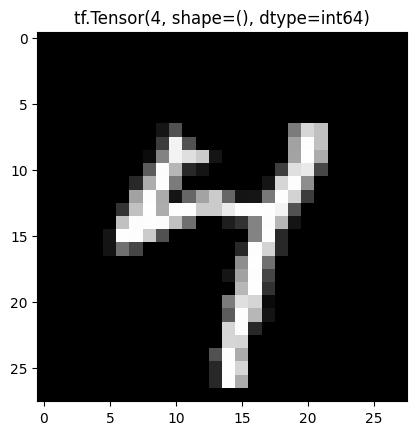

In [18]:
# inspect data
# takes a sample of the dataset
# use snake case with _
# use chain to use sub commands with .
for x, y in dataset_train_original.shuffle(60_000).take(1):
  plt.imshow(x, cmap="gray")
  plt.title(str(y))

In [19]:
# normalise dataset
def encode(image, label):
  # encodes data
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  return image, label

# lambda is an anonymous function; .map applies to multiple data types; apply encode to each data point
#dataset = dataset_train_original.map(lambda image, label: encode(image, label)) 
dataset = dataset_train_original.map(encode)

for image, label in dataset.take(1):
  print(image.dtype, image.shape)
  print(label)

<dtype: 'float32'> (28, 28, 1)
tf.Tensor(4, shape=(), dtype=int64)


In [20]:
dataset_train = dataset_train_original.map(encode).cache().shuffle(60_000).batch(128)
dataset_validate = dataset_validate_original.map(encode).cache().batch(128)
dataset_test = dataset_test_original.map(encode).cache().batch(128)


In [21]:
# define architecture of model
# this defines a model in tensorflow
# stackable API is .Sequential()
# produces 200175 trainable parameters

# 1. Build Neural Network

# starts with low activation scores
model = models.Sequential()
# sets dimensions of input
model.add(layers.Flatten(input_shape=(28, 28, 1)))
# add input layer with 255 units and 
model.add(layers.Dense(units=255, activation="relu"))
# add hidden layer with 128 units
model.add(layers.Dense(units=128, activation="relu"))
# add output layer, linear, then softmax activation (probability 0-1 of output being category)
model.add(layers.Dense(units=10, activation="softmax"))
model.summary()

# 2. Train model

model.compile(
    # gradient descent optimization
    # adam is influenced by stochastic gradient descent
    optimizer="adam",
    # distance between expected and observed values
    # we're predicting 10 categories
    loss="sparse_categorical_crossentropy",
    # add evaluation
    # we need metrics to show accuracy
    # easier to interpret than probability scores
    metrics=["accuracy"]
)

model.fit(
    dataset_train,
    epochs=100,
    validation_data=dataset_validate
)
# backgpropagation

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 255)               200175    
                                                                 
 dense_16 (Dense)            (None, 128)               32768     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 234233 (914.97 KB)
Trainable params: 234233 (914.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 0.2757 - accuracy: 0.9208 - val_loss: 0.1281 - val_accuracy: 0.9604
Epo

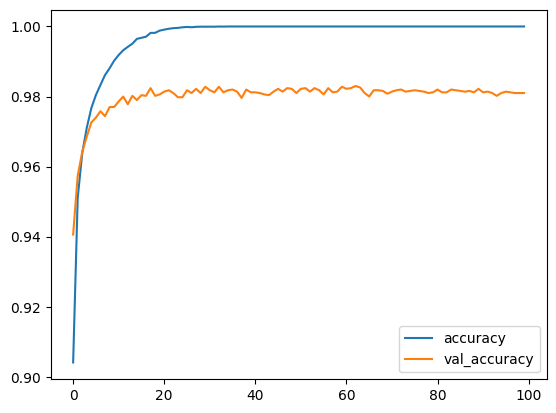

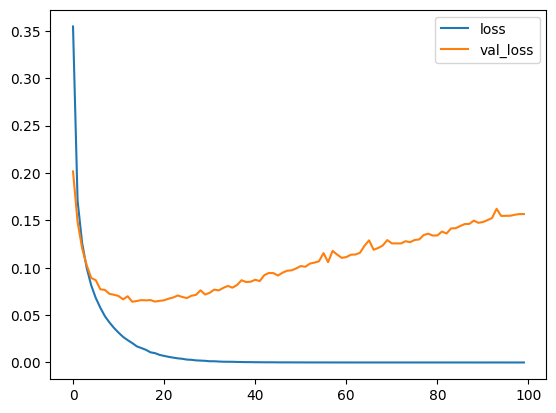

In [ ]:
# display key names from dictionary
model.history.history.keys()
# plot validation loss with training accuracy
plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

In [22]:
from tensorflow.keras import models, layers, optimizers

# Define your model architecture
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(units=255, activation="relu"))
model.add(layers.Dense(units=128, activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))
model.summary()

# Set a custom learning rate for the Adam optimizer
custom_learning_rate = 0.001  # Example learning rate, adjust as needed
adam_optimizer = optimizers.Adam(learning_rate=custom_learning_rate)

# Compile the model with the customized optimizer
model.compile(
    optimizer=adam_optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_validate
)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 255)               200175    
                                                                 
 dense_19 (Dense)            (None, 128)               32768     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 234233 (914.97 KB)
Trainable params: 234233 (914.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2736 - accuracy: 0.9214 - val_loss: 0.1196 - val_accuracy: 0.9652
Epoc

# Plot Adam with Custom Learning Rate

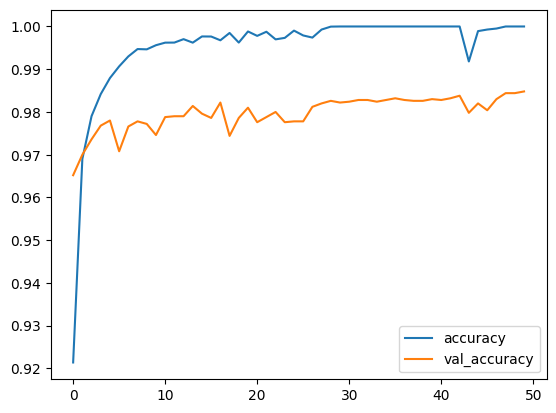

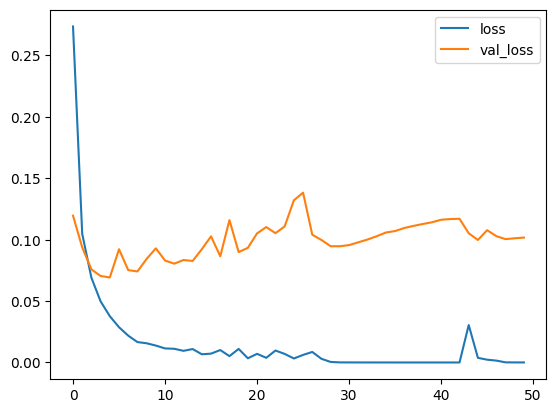

In [23]:
# display key names from dictionary
model.history.history.keys()
# plot validation loss with training accuracy
plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

In [24]:
from tensorflow.keras import models, layers, optimizers

# Define your model architecture
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(units=255, activation="relu"))
model.add(layers.Dense(units=128, activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))
model.summary()

# Set a custom learning rate for the Adam optimizer
custom_learning_rate = 0.001  # Example learning rate, adjust as needed

# Set optimizer to Adam
#adam_optimizer = optimizers.Adam(learning_rate=custom_learning_rate)

# change adam optimizer to RMSprop
#rmsprop_optimizer = optimizers.RMSprop(learning_rate=custom_learning_rate)

# change optimizer to Adamx
adam_optimizer = optimizers.Adamax(learning_rate=custom_learning_rate)

# Compile the model with the customized optimizer
model.compile(
    #optimizer=adam_optimizer,
    optimizer=adam_optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(
    dataset_train,
    epochs=100,
    validation_data=dataset_validate
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 255)               200175    
                                                                 
 dense_22 (Dense)            (None, 128)               32768     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 234233 (914.97 KB)
Trainable params: 234233 (914.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 0.3589 - accuracy: 0.9020 - val_loss: 0.2012 - val_accuracy: 0.9418
Epo

# Plot Adamx

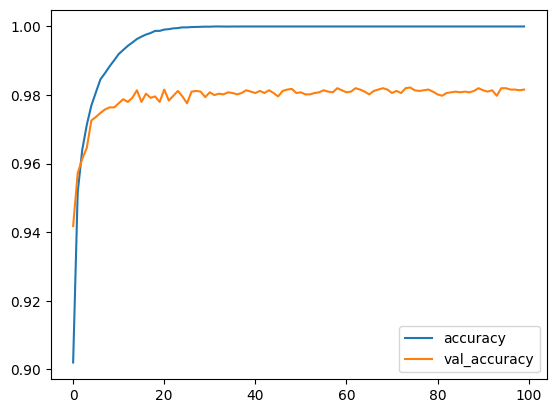

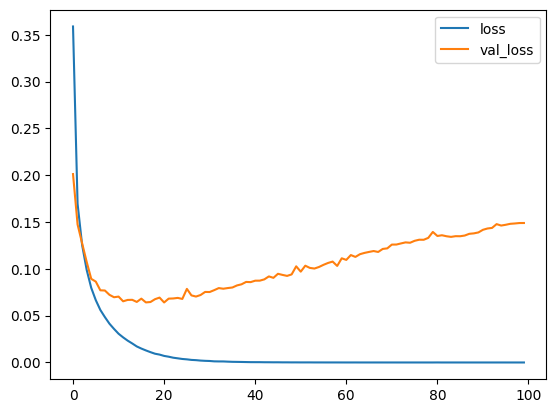

In [25]:
# display key names from dictionary
model.history.history.keys()
# plot validation loss with training accuracy
plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()